In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
dframe = pd.read_csv('Weights_Heights.csv')

In [3]:
dframe.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


**Checking null values**

In [4]:
dframe.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

There are no null values in the data set

**Description of data set**

In [5]:
dframe.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


From the above output Mean of Height and Weight are different and also standard deviation. 

**Finding relationship between Gender and Height**

In [6]:
print(dframe.groupby('Gender')['Height'].describe())


         count       mean       std  ...        50%        75%        max
Gender                               ...                                 
Female  5000.0  63.708774  2.696284  ...  63.730924  65.563565  73.389586
Male    5000.0  69.026346  2.863362  ...  69.027709  70.988744  78.998742

[2 rows x 8 columns]


It can be seen that the mean of height and standard deviation of height for male and female are different. Hence, there is a meaningful difference between gender and height. Thus, there seems to be a relationship between gender and height.



**Finding difference between Gender and Weight**

In [7]:
print(dframe.groupby('Gender')['Weight'].describe())


         count        mean        std  ...         50%         75%         max
Gender                                 ...                                    
Female  5000.0  135.860093  19.022468  ...  136.117583  148.810926  202.237214
Male    5000.0  187.020621  19.781155  ...  187.033546  200.357802  269.989699

[2 rows x 8 columns]


It can be seen that the mean of weight and standard deviation of weight for male and female are different. Hence, there is a meaningful difference between gender and height. Thus, there seems to be a relationship between gender and height.



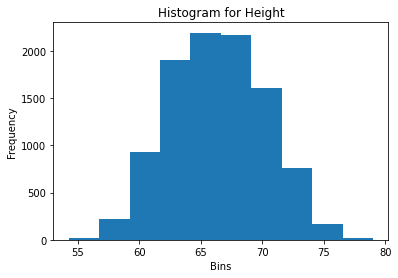

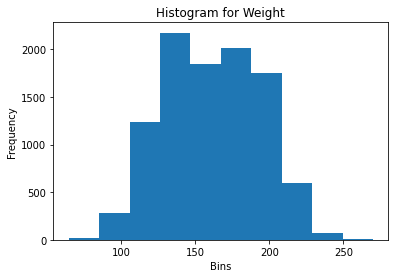

In [9]:
#histogram for height
height = dframe['Height']
plt.hist(height, bins = 10)
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.title('Histogram for Height')
plt.show()

#histogram for weight
weight = dframe['Weight']
plt.hist(weight, bins = 10)
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.title('Histogram for Weight')
plt.show()

Both Height and Weight are normally distributed

**Defining and Splitting the data**

In [22]:
#defining the variable "X" and "y"
X = dframe.iloc[:, 1:3].values
y = dframe.iloc[:,0:1].values
print(X)
print(y)

[[ 73.84701702 241.89356318]
 [ 68.78190405 162.31047252]
 [ 74.11010539 212.74085556]
 ...
 [ 63.86799221 128.47531878]
 [ 69.03424313 163.85246135]
 [ 61.94424588 113.64910268]]
[['Male']
 ['Male']
 ['Male']
 ...
 ['Female']
 ['Female']
 ['Female']]


In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 0)

Now, that we have described our data and now that we know the data is clean to analyse, we create test and train data set. The general 80:20 split has been used where 80% of data is split into training set and 20% of data is split into test set.


**classifiers**
The following are the classifiers that are used for Binary classification 

1. Binary Decision Tree
2. Support Vector Machine
3. k-n Neighbours Classifier




In [52]:
clf1 = tree.DecisionTreeClassifier()
clf2 = svm.SVC(gamma='auto')
clf3 = neighbors.KNeighborsClassifier()
clf4 = LogisticRegression()

#fitting data
clf1 = clf1.fit(X_train,y_train)
clf2 = clf2.fit(X_train,y_train)
clf3 = clf3.fit(X_train, y_train)
clf4 = clf4.fit(X_train, y_train)


In [37]:
#making predictions
prediction1 = clf1.predict(X_test)
prediction2 = clf2.predict(X_test)
prediction3 = clf3.predict(X_test)
prediction4 = clf4.predict(X_test)

**Evaluating Model**
1. Classification Accuracy

In [38]:
r1 = accuracy_score(y_test, prediction1)
r2 = accuracy_score(y_test, prediction2)
r3 = accuracy_score(y_test, prediction3)
r4 = accuracy_score(y_test, prediction4)



In [39]:
print("Accuracy score of Model 1: DecisionTreeClassifier is "+str(r1))
print("Accuracy score of Model 2: SupportVectorMachine is "+str(r2))
print("Accuracy score of Model 3: KNN is "+str(r3))
print("Accuracy score of Model 4: LogisticRegression is "+str(r4))


Accuracy score of Model 1: DecisionTreeClassifier is 0.8732
Accuracy score of Model 2: SupportVectorMachine is 0.918
Accuracy score of Model 3: KNN is 0.9016
Accuracy score of Model 4: LogisticRegression is 0.9184


2. Sensitivity and Specificity

In [42]:
#confusion matrix

#decision tree
cm1 = confusion_matrix(y_test, prediction1)
TP1 = cm1[1,1]
TN1 = cm1[0,0]
FP1 = cm1[0,1]
FN1 = cm1[1,0]

#svm
cm2 = confusion_matrix(y_test, prediction2)
TP2 = cm2[1,1]
TN2 = cm2[0,0]
FP2 = cm2[0,1]
FN2 = cm2[1,0]

#knn
cm3 = confusion_matrix(y_test, prediction3)
TP3 = cm3[1,1]
TN3 = cm3[0,0]
FP3 = cm3[0,1]
FN3 = cm3[1,0]

#logisticregression
cm4 = confusion_matrix(y_test, prediction4)
TP4 = cm4[1,1]
TN4 = cm4[0,0]
FP4 = cm4[0,1]
FN4 = cm4[1,0]


In [45]:
#sensitivity
sen1 = TP1 / float(FN1 + TP1)
sen2 = TP2 / float(FN2 + TP2)
sen3 = TP3 / float(FN3 + TP3)
sen4 = TP4 / float(FN4 + TP4)



#specificity
spec1 = TN1 / (TN1 + FP1)
spec2 = TN2 / (TN2 + FP2)
spec3 = TN3 / (TN3 + FP3)
spec4 = TN4 / (TN4 + FP4)


In [46]:
print("Sensitivity Rate of Decision Tree: "+ str(sen1))
print("Sensitivity Rate of SVM: "+ str(sen2))
print("Sensitivity Rate of KNN: "+ str(sen3))
print("Sensitivity Rate of LogisticRegression: "+ str(sen4))

print()
print("Specificity Rate of Decision Tree: "+ str(spec1))
print("Specificity Rate of SVM: "+ str(spec2))
print("Specificity Rate of KNN: "+ str(spec3))
print("Specificity Rate of LogisticRegression: "+ str(spec4))

print()

Sensitivity Rate of Decision Tree: 0.8646080760095012
Sensitivity Rate of SVM: 0.9113222486144101
Sensitivity Rate of KNN: 0.8962787015043547
Sensitivity Rate of LogisticRegression: 0.9152810768012668

Specificity Rate of Decision Tree: 0.8819725141471302
Specificity Rate of SVM: 0.9248181083265966
Specificity Rate of KNN: 0.9070331447049312
Specificity Rate of LogisticRegression: 0.9215844785772029



In [47]:
print("Classification Report: Decision Tree")
print(classification_report(y_test, prediction1))
print("Classification Report: SVM")
print(classification_report(y_test, prediction2))
print("Classification Report: KNN")
print(classification_report(y_test, prediction3))
print("Classification Report: LogisticRegression")
print(classification_report(y_test, prediction4))

Classification Report: Decision Tree
              precision    recall  f1-score   support

      Female       0.86      0.88      0.87      1237
        Male       0.88      0.86      0.87      1263

    accuracy                           0.87      2500
   macro avg       0.87      0.87      0.87      2500
weighted avg       0.87      0.87      0.87      2500

Classification Report: SVM
              precision    recall  f1-score   support

      Female       0.91      0.92      0.92      1237
        Male       0.93      0.91      0.92      1263

    accuracy                           0.92      2500
   macro avg       0.92      0.92      0.92      2500
weighted avg       0.92      0.92      0.92      2500

Classification Report: KNN
              precision    recall  f1-score   support

      Female       0.90      0.91      0.90      1237
        Male       0.91      0.90      0.90      1263

    accuracy                           0.90      2500
   macro avg       0.90      0.90    

From the about classification report I can conclude that,
When actual value is male then:
1. Decision Tree has accuracy of 88%
2. SVM has accuracy of 93%
3. KNN has accuracy of 91%
4. Logistic Regression has accuracy of 92%

When actual value is female then:
1. Decision Tree has accuracy of 86%
2. SVM has accuracy of 91%
3. KNN has accuracy of 90%
4. Logistic Regression has accuracy of 91% 


**Predicting the model**

In [53]:
height = 61
weight = 145
prediction = clf2.predict([[height, weight]])
print("The classifier predicts that you could be " +str(prediction[0]))

The classifier predicts that you could be Female


As I gave my height and weight so it predicted my gender correctly. You can try the above code for predictions 